In [176]:
import numpy as np
import matplotlib.pyplot as plt

In [177]:
import os
import shutil
import time

You run 

        ./.bin/flatsininit N u0 eps dx
Where dx MUST be the same in parameters.txt (the one you use for the evolution)

And then you evolve
        
        ./.bin/tdglfd 0         # For preparing the tdgl_result.dat file
        ./.bin/tdgl tspan       # For evolution

At the end, you run this python script to see how $\delta u(x)$ is evolved (if it is grown)

In [178]:
# Save instability growth
u0 = 1.2
eps = 0.1

# Plot final state

You expect to have mode growth if u0 << 0.5481191950628702


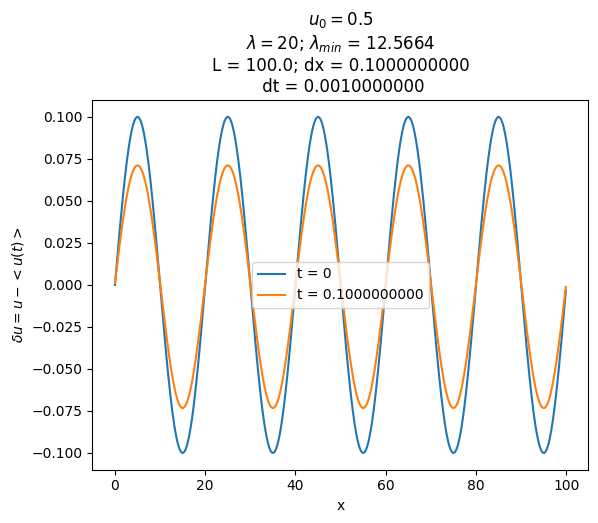

In [179]:
f, ax = plt.subplots()
f = open("tdgl_result.dat", "r")
N = 1000000000
x = np.zeros(N)
y = np.zeros(N)

y0 = np.zeros(N)
#lam = 2*np.pi/(np.sqrt(0.1))   #It's about 20
lam = 20
u0_max = np.sqrt((1-np.pi**2/100)/3)
lam_min = 2*np.pi/(np.sqrt(1-3*u0*u0))
print("You expect to have mode growth if u0 << " + str(u0_max));

i = 0
for row in f:
    if i != 0:
        a, b = row.split(" ")
        x[i-1] = float(a)
        y[i-1] = float(b)
        y0[i-1] = eps*np.sin(2*np.pi*x[i-1]/lam)
    else:
        N, tmax, dx, dt, seed, A, Thalf, Cave = row.split(" ")
    i = i + 1

yave = np.mean(y[0:i-1])

#eps = 0.5
ax.plot(x[0:i-1], y0[0:i-1], label = "t = 0")
ax.plot(x[0:i-1], y[0:i-1]-yave*np.ones(i-1), label = "t = " + str(tmax))
ax.set_xlabel("x")
ax.set_ylabel("$\delta u = u-<u(t)>$")
ax.set_title("$u_0 = $" + str(u0) + "\n$\lambda = $" + str(lam) + "; $\lambda_{min}$ = " + str(round(lam_min, 4)) + "\nL = " + str(int(N)*float(dx)) + "; dx = " + str(dx) + "\n dt = " + str(dt))
#plt.ylim(-1-eps,1+eps)
ax.legend()

In [180]:
yave

1.153214940755162